<p style="text-align:center">
    <a href="https://rofer.org/">
    <img src="https://rofer.org/wp-content/uploads/2022/09/analytics.png" width="200" alt="Machine Learning Mobile Price Prediction"  />
    </a>
</p>

# <font color="blue"><center>www.rofer.org</center>
## <font color="blue"><center>DIGITAL & DATA ENTHUSIAST</center></font>

# Using Multiple Linear Regression for mobile price prediction

Suitable for ecommerce retail sites who wants to stay competitive with their pricing & attract more customers to use their platformwhen buying mobile devices

## Project Context

A new ecommerce retail app just started to launch their mobile phone category. Due to competitive nature of this category they wanted to satay competitive interms of pricing as they are also competiting with large e-retailers such as Shopee and Lazada

My work process flow

*   Use Multiple linear regression model to predict mobile phone prize 
*   Perform data cleansing and EDA. <a href="https://www.kaggle.com/datasets/gyanprakashkushwaha/samsung-mobiles-latest-dataset">Data source is from Kaggle</a> which is already processed and cleansed
*   Target variable is the price features
*   Identifying independent variables that is strongly correlated with our target variable
*   Perform independent variable engineering when necessary
*   Built a model using SKlearn
*   Perform Train/Test split to build the model
*   Perform Train/Test evaluation approach
*   For other <a href="https://rofer.org/">data related Data Analysis please check rofer.org</a>



## Loading the downloaded dataset

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_colwidth", 100)
df = pd.read_csv("mobile_phone_ecom_data.csv")
df.shape

(1359, 22)

In [2]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


## Review column names and rename for simplification and consistency

In [3]:
df.columns

Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')

In [4]:
df.rename(columns={'Battery capacity (mAh)': 'battery_capacity', 
                   'Screen size (inches)': 'screen_size',
                   'Resolution x': 'resolution_x',
                   'Resolution y': 'resolution_y',
                   'RAM (MB)': 'ram',
                   'Internal storage (GB)': 'storage',}, inplace=True)

## Review data types and convert target variable to float data type

Review filetypes

In [5]:
df.dtypes

Unnamed: 0            int64
Name                 object
Brand                object
Model                object
battery_capacity      int64
screen_size         float64
Touchscreen          object
resolution_x          int64
resolution_y          int64
Processor             int64
ram                   int64
storage             float64
Rear camera         float64
Front camera        float64
Operating system     object
Wi-Fi                object
Bluetooth            object
GPS                  object
Number of SIMs        int64
3G                   object
4G/ LTE              object
Price                 int64
dtype: object

In [6]:
df["Price"] = df["Price"].astype(float)

In [7]:
df.groupby("Brand")["Price"].sum()

Brand
10.or       29995.0
Acer        12940.0
Alcatel     92016.0
Apple      773678.0
Aqua         4599.0
             ...   
Zopo        72335.0
Zuk         29124.0
iBall       56714.0
iVoomi      64302.0
mPhone      13898.0
Name: Price, Length: 76, dtype: float64

## Dataframe is already in good condition to perform EDA. Assigning it to another DF and start EDA

In [8]:
df_mobile = df

# Exploratory Data Analysis

In [9]:
df_mobile.describe()

,Unnamed: 0,battery_capacity,screen_size,resolution_x,resolution_y,Processor,ram,storage,Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,679.000000,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,392.453819,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,0.000000,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,339.500000,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,679.000000,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,1018.500000,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,1358.000000,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


In [10]:
##df_mobile["Price"].describe()

## Importing visualization libraries for easier data analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

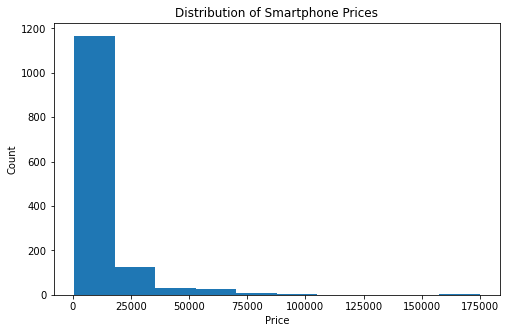

In [12]:
df_mobile['Price'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Distribution of Smartphone Prices')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('Price')

plt.show()

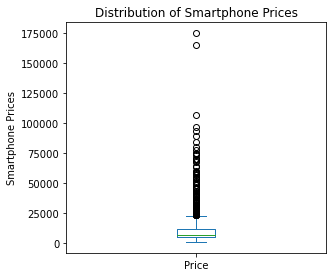

In [13]:
df_mobile_price = df_mobile["Price"]

##df_mobile_price.plot(kind='box', figsize=(10, 10))

df_mobile_price.plot(kind='box')

plt.title('Distribution of Smartphone Prices')
plt.ylabel('Smartphone Prices')

##plt.show()
plt.subplots_adjust(left=0.2, right=0.8, bottom=0.1, top=0.9)

## We will be removing outliers. Outliers dataset will be analyzed separately. Meanwhile, dataset without outliers will be used for modeling

In [14]:
Expensive_phones = df_mobile.loc[df_mobile["Price"]>25000]
Expensive_phones.shape

(127, 22)

In [15]:
df_mobile = df_mobile.loc[df_mobile["Price"]<=25000]
df_mobile.shape

(1232, 22)

##Recreating boxplot after removing outliers

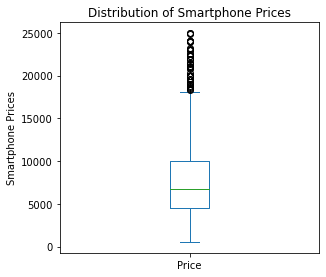

In [16]:
df_mobile_price = df_mobile["Price"]

##df_mobile_price.plot(kind='box', figsize=(10, 10))

df_mobile_price.plot(kind='box')

plt.title('Distribution of Smartphone Prices')
plt.ylabel('Smartphone Prices')

##plt.show()
plt.subplots_adjust(left=0.2, right=0.8, bottom=0.1, top=0.9)

In [17]:
df_mobile.columns

Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'battery_capacity',
       'screen_size', 'Touchscreen', 'resolution_x', 'resolution_y',
       'Processor', 'ram', 'storage', 'Rear camera', 'Front camera',
       'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS', 'Number of SIMs', '3G',
       '4G/ LTE', 'Price'],
      dtype='object')

## Feature selection and understanding their relationships
Select choose Battery capacity, Screen size, Processor, RAM (MB), Internal storage (GB), Resolution x, Resolution y to analyze correlation with the price

In [18]:
df_mobile_features = df_mobile[["battery_capacity",
                                "screen_size",
                                "resolution_x",
                                "resolution_y",
                                "Processor",
                                "ram",
                                "storage",
                                "Price",]]

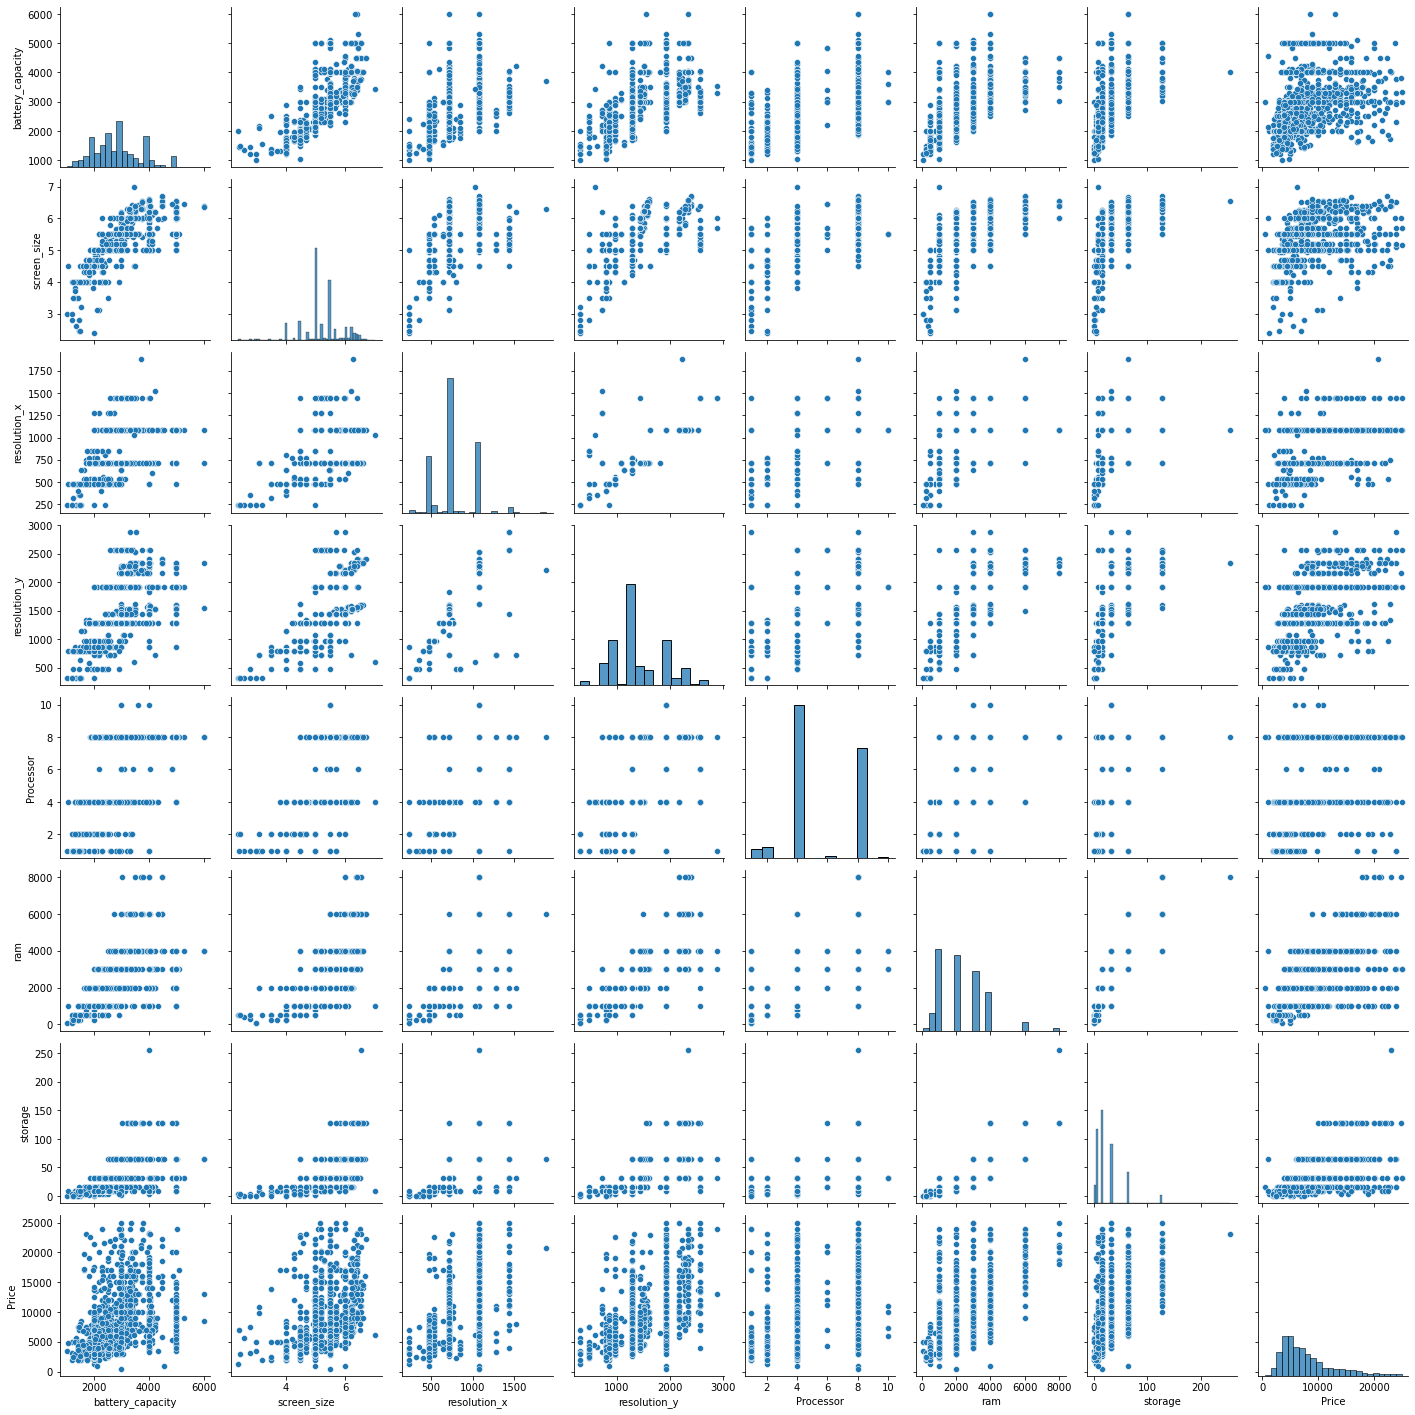

In [19]:
sns.pairplot(data=df_mobile_features)

Use battery capacity, screen size, resolution x, resolution y and ram to predict phone price

In [20]:
df_mobile_features_reg = df_mobile[["screen_size",
                                "resolution_x",
                                "resolution_y",
                                "ram",
                                "Price"]]

(0.0, 26368.95808741731)

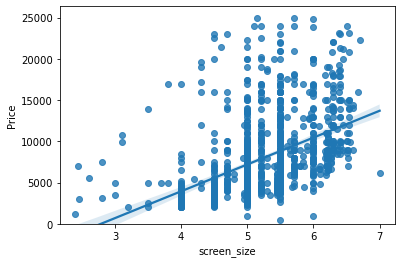

In [21]:
##identifying relationship between screen size and price
sns.regplot(x="screen_size", y="Price", data=df_mobile_features_reg)
plt.ylim(0)

(0.0, 26224.25)

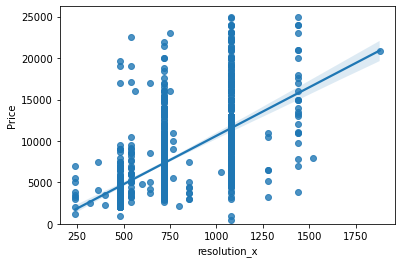

In [22]:
##identifying relationship between resolution x and price
sns.regplot(x="resolution_x", y="Price", data=df_mobile_features_reg)
plt.ylim(0)

(0.0, 26224.25)

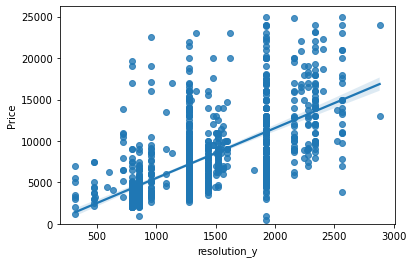

In [23]:
##identifying relationship between resolution y and price
sns.regplot(x="resolution_y", y="Price", data=df_mobile_features_reg)
plt.ylim(0)

(0.0, 26224.25)

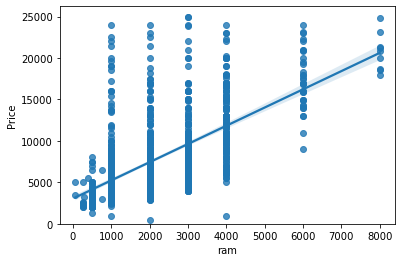

In [24]:
##identifying relationship between screen size and price
sns.regplot(x="ram", y="Price", data=df_mobile_features_reg)
plt.ylim(0)

## We will be using Screensize, resolution_x, resolution_y and ram as independent features to predict the price

# Start of our Machine Learning development

*   Let's split the dataset as 80% for training and 20% for testing
*   We will use the 80% to train our model 
*   We will use the 20% to test and evaluate our model 
*   We will MSE and variance score to evaluate the distance of our model prediction versus actual data from test dataset

<center>
    <img src="https://rofer.org/wp-content/uploads/2020/10/pexels-kaboompics-com-6224.jpg" width="500" alt="Machine Learning Mobile Price Prediction"  />
</center>

In [25]:
msk = np.random.rand(len(df_mobile_features_reg)) < 0.8
train = df_mobile_features_reg[msk]
test = df_mobile_features_reg[~msk]

In [26]:
train.head()

,screen_size,resolution_x,resolution_y,ram,Price
10,6.50,1080,2340,6000,23990.0
12,6.39,1080,2340,6000,19282.0
15,6.30,1080,2340,4000,13999.0
17,6.30,1080,2340,4000,9799.0
29,5.99,1080,2160,3000,9990.0


In [27]:
test.head()

,screen_size,resolution_x,resolution_y,ram,Price
9,6.39,1080,2340,6000,23190.0
11,6.53,1080,2340,4000,14999.0
66,5.50,720,1280,2000,7999.0
75,6.40,1080,2340,4000,16999.0
79,6.38,1080,2340,4000,15990.0


In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['screen_size','resolution_x','resolution_y','ram']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-587.31839104    3.31708946    2.13540685    1.35783946]]
Intercept:  [2430.97144309]


In [29]:
test_x = test[['screen_size','resolution_x','resolution_y','ram']]
a = test["Price"]

In [30]:
predictions = regr.predict(test_x)

/Users/nfmac/.local/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Return original price and predictions in the test set

In [31]:
test_x["predictions"] = predictions
test_x["orginal_price"] = a

In [32]:
# Simpler highlighting using set_properties
highlighted_df = test_x.style \
    .set_properties(**{'background-color': 'lightgreen'}, subset=["predictions","orginal_price"])

# Display the highlighted DataFrame
highlighted_df

,screen_size,resolution_x,resolution_y,ram,predictions,orginal_price
9,6.390000,1080,2340,6000,15404.352330,23190.000000
11,6.530000,1080,2340,4000,12606.448839,14999.000000
66,5.500000,720,1280,2000,7038.024394,7999.000000
75,6.400000,1080,2340,4000,12682.800230,16999.000000
79,6.380000,1080,2340,4000,12694.546598,15990.000000
81,6.400000,1080,2340,4000,12682.800230,14999.000000
88,6.080000,720,1560,4000,10010.972563,11845.000000
92,6.300000,1080,2520,4000,13125.905302,13690.000000
110,6.180000,1080,2244,4000,12607.011218,18000.000000
115,6.300000,1080,2280,4000,12613.407658,16490.000000


In [33]:
y_hat= regr.predict(test[['screen_size','resolution_x','resolution_y','ram']])
x = np.asanyarray(test[['screen_size','resolution_x','resolution_y','ram']])
y = np.asanyarray(test[['Price']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 11370253.56
Variance score: 0.47


/Users/nfmac/.local/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## We have to continue optimizing our model by measuring MSE and Variance score

Impact of High Variance:

High variance can lead to poor performance on unseen data. The model may not generalize well to new examples.
Low Variance is Desirable:

A low variance suggests the model is fitting the training data well. The errors are relatively small and scattered around the predicted values.


(0.0, 18726.63789205226)

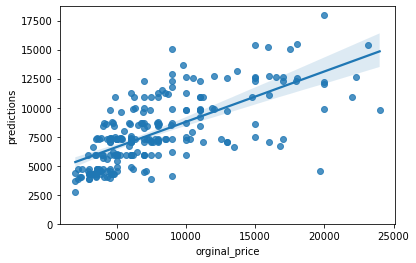

In [34]:
sns.regplot(x="orginal_price", y="predictions", data=test_x)
plt.ylim(0)

## Optimize model by including the phone brands in one of the dataset features

In [35]:
df_mobile.groupby("Brand")["Brand"].count()

Brand
10.or       5
Acer        2
Alcatel    10
Apple       5
Aqua        1
           ..
Ziox        9
Zopo       12
iBall      14
iVoomi     16
mPhone      2
Name: Brand, Length: 71, dtype: int64

In [36]:
df_mobile["brand_categ"] = df_mobile["Brand"].astype("category")

/var/folders/5t/zhf5zpq97_v0_wbwkg9r5h200000gn/T/ipykernel_2167/3066658314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile["brand_categ"] = df_mobile["Brand"].astype("category")


In [37]:
df_mobile["brand_categ"] = df_mobile["brand_categ"].cat.codes
df_mobile.head(2)

/var/folders/5t/zhf5zpq97_v0_wbwkg9r5h200000gn/T/ipykernel_2167/2782913045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile["brand_categ"] = df_mobile["brand_categ"].cat.codes


,Unnamed: 0,Name,Brand,Model,battery_capacity,screen_size,Touchscreen,resolution_x,resolution_y,Processor,...,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,brand_categ
9,9,Xiaomi Redmi K20 Pro,Xiaomi,Redmi K20 Pro,4000,6.39,Yes,1080,2340,8,...,20.0,Android,Yes,Yes,Yes,2,No,No,23190.0,61
10,10,Oppo K3,Oppo,K3,3765,6.50,Yes,1080,2340,8,...,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,23990.0,43


In [38]:
df_mobile.groupby("brand_categ")["Brand"].count()

brand_categ
0      5
1      2
2     10
3      5
4      1
      ..
66     9
67    12
68    14
69    16
70     2
Name: Brand, Length: 71, dtype: int64

In [39]:
df_mobile["brand_categ"] = df_mobile["brand_categ"].astype(float)

/var/folders/5t/zhf5zpq97_v0_wbwkg9r5h200000gn/T/ipykernel_2167/910925303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile["brand_categ"] = df_mobile["brand_categ"].astype(float)


In [40]:
df_mobile_features_reg2 = df_mobile[["screen_size",
                                "resolution_x",
                                "resolution_y",
                                "ram",
                                "Price",
                                "brand_categ"]]

In [41]:
msk = np.random.rand(len(df_mobile_features_reg2)) < 0.8
train1 = df_mobile_features_reg2[msk]
test1 = df_mobile_features_reg2[~msk]

In [42]:
train1.head(3)

,screen_size,resolution_x,resolution_y,ram,Price,brand_categ
9,6.39,1080,2340,6000,23190.0,61.0
11,6.53,1080,2340,4000,14999.0,49.0
12,6.39,1080,2340,6000,19282.0,61.0


In [43]:
test1.head(3)

,screen_size,resolution_x,resolution_y,ram,Price,brand_categ
10,6.5,1080,2340,6000,23990.0,43.0
48,5.5,1080,1920,6000,19999.0,41.0
54,5.5,1080,1920,6000,22999.0,41.0


In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x1 = np.asanyarray(train1[['screen_size','resolution_x','resolution_y','ram','brand_categ']])
train_y1 = np.asanyarray(train1[['Price']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-480.34917754    3.08817992    2.06880084    1.40014231   -3.86258334]]
Intercept:  [2185.23430822]


In [45]:
test_x1 = test1[['screen_size','resolution_x','resolution_y','ram','brand_categ']]
b = test1["Price"]

In [46]:
predictions = regr.predict(test_x1)

/Users/nfmac/.local/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [47]:
test_x1["predictions"] = predictions
test_x1["orginal_price"] = b

In [48]:
test_x1.head()

,screen_size,resolution_x,resolution_y,ram,brand_categ,predictions,orginal_price
10,6.50,1080,2340,6000,43.0,15473.955681,23990.0
48,5.50,1080,1920,6000,41.0,15093.133674,19999.0
54,5.50,1080,1920,6000,41.0,15093.133674,22999.0
58,5.10,1440,2560,4000,50.0,14886.002794,23999.0
67,6.52,720,1600,3000,49.0,8598.088889,6999.0


In [49]:
# Simpler highlighting using set_properties
highlighted_df1 = test_x1.style \
    .set_properties(**{'background-color': 'lightgreen'}, subset=["predictions","orginal_price"])

# Display the highlighted DataFrame
highlighted_df1

,screen_size,resolution_x,resolution_y,ram,brand_categ,predictions,orginal_price
10,6.500000,1080,2340,6000,43.000000,15473.955681,23990.000000
48,5.500000,1080,1920,6000,41.000000,15093.133674,19999.000000
54,5.500000,1080,1920,6000,41.000000,15093.133674,22999.000000
58,5.100000,1440,2560,4000,50.000000,14886.002794,23999.000000
67,6.520000,720,1600,3000,49.000000,8598.088889,6999.000000
73,6.530000,1080,2340,4000,60.000000,12593.596679,10990.000000
74,6.500000,720,1600,4000,49.000000,10007.838178,9999.000000
78,6.400000,1080,2340,4000,50.000000,12694.667906,12999.000000
102,6.260000,720,1520,2000,61.000000,7110.982303,7332.000000
119,6.400000,1080,2340,8000,43.000000,18322.275209,21299.000000


In [50]:
y_hat= regr.predict(test1[['screen_size','resolution_x','resolution_y','ram','brand_categ']])
x = np.asanyarray(test1[['screen_size','resolution_x','resolution_y','ram','brand_categ']])
y = np.asanyarray(test1[['Price']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 12077064.73
Variance score: 0.48


/Users/nfmac/.local/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## We have to continue optimizing our model by measuring MSE and Variance score

Including the brand category made the MSE higher and Variance score lower than before. This means that it may not be a suitable feature to continously optimize and build the model


(0.0, 19133.879111463673)

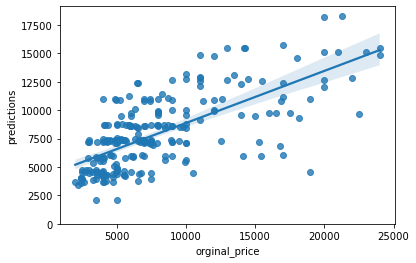

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

sns.regplot(x="orginal_price", y="predictions", data=test_x1)
plt.ylim(0)



## Summary:
    
## To build a model with high accuracy it is important to continously do independent feature discovery and it's relationship with the target value. Keep doing this process until you build a model with better MSE and Variance score

## Important Considerations:

*   It's crucial to avoid going to the other extreme - high bias. This occurs when the model overfits the data, memorizing the training examples but failing to capture the general trends.

*   The ideal scenario is to find a balance between variance and bias. This can be achieved through techniques like regularization or using a more complex model with careful selection of features.

## There isn't a single standard variance metric used in Python for linear regression. However, some common ways to assess model fit and indirectly gauge variance include:

*   Mean Squared Error (MSE): A lower MSE indicates a better fit, which often coincides with lower variance.
*   R-squared: This value reflects the proportion of variance in the dependent variable explained by the independent variables. A higher R-squared suggests lower variance.

# <font color="red">Remember:

## The specific metrics used for evaluation will depend on the problem you're trying to solve.</font>